# Vamos aprender sobre EDA! 😄 :
---



Agora que vocês já aprenderam os principais pontos sobre o assunto e compreenderam a importância de trabalhar com dados limpos e bem estruturados, é hora de colocar esse conhecimento em prática. Disponibilizamos 6 datasets reais, variando em tamanho e complexidade, para que vocês possam escolher aquele com o qual preferem trabalhar. O objetivo agora é aplicar suas novas habilidades, limpando os dados e extraindo insights a partir deles.
**Lembrando que é necessário selecionar apenas um dataset para desenvolver a atividade.** 😉

###Os datasets são:


*   **Mais de 30.000 filmes lançados nos últimos 60 anos**: este dataset inclui uma ampla gama de informações, como data de lançamento, diretor, indicações ao Oscar e orçamento.
*   **Titanic**: traz dados detalhados sobre as vítimas do trágico acidente, incluindo gênero, idade e número do bilhete.
*   **Aplicativo de namoro**: apresenta informações como quantidade de filhos, interesses e nível educacional dos usuários.
*   **Vinhos**: fornece dados sobre o país de origem, avaliação dos consumidores e preço.
*   **Acidentes de trânsito**: inclui variáveis como densidade do tráfego, quantidade de chuva e velocidade.
*   **Casamento e divorcios na Índia**: abrange aspectos como duração do casamento, tipo de união e casta.








## 1.1 - Leitura dos dados e realização de descrição estatística
---



O dataframe será gerado automaticamente ao executar a célula com o método `pd.read_csv()` da biblioteca [pandas](https://pandas.pydata.org/pandas-docs/stable/).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Forma manual de abrir o arquivo
import csv

with open("Dating App Dataset.csv", mode="r", encoding="utf-8") as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)

['User ID', 'Age', 'Gender', 'Height', 'Interests', 'Looking For', 'Children', 'Education Level', 'Occupation', 'Swiping History', 'Frequency of Usage']
['1', '30', 'Male', '5.240384818289867', "['Sports', 'Cooking', 'Hiking', 'Music', 'Movies', 'Reading', 'Travel']", 'Casual Dating', 'No', 'High School', 'Student', '96', 'Weekly']
['2', '27', 'Female', '4.937625189981325', "['Sports', 'Reading']", 'Friendship', 'Yes', "Master's Degree", 'Artist', '96', 'Monthly']
['3', '29', 'Female', '5.806295844533026', "['Sports']", 'Casual Dating', 'No', "Bachelor's Degree", 'Social Media Influencer', '64', 'Daily']
['4', '29', 'Female', '5.101402346041159', "['Reading']", 'Marriage', 'No', 'Ph.D.', 'Doctor', '67', 'Daily']
['5', '32', 'Male', '5.986670327920848', "['Sports', 'Hiking', 'Music', 'Movies', 'Reading']", 'Long-term Relationship', 'Yes', 'Ph.D.', 'Engineer', '93', 'Monthly']
['6', '25', 'Female', '5.192045043820928', "['Sports', 'Cooking', 'Movies', 'Music', 'Travel', 'Reading', 'Hikin

Comparando os métodos de como abrir um arquivo CSV, fica fácil entender por que o Pandas é tão útil. Fazer tudo "na mão" com open() exige abrir o arquivo, ler linha por linha, separar valores e tratar dados manualmente — dá trabalho e é fácil errar.

Com o Pandas, basta um comando como pd.read_csv("arquivo.csv"), e tudo fica organizado em uma tabela, com tipos de dados reconhecidos e várias ferramentas prontas para análise.😊

In [4]:
# Usando Pandas para abrir o arquivo
# Adicione entre as '' o caminho do arquivo correspondente ao dataset selecionado.
dataset = pd.read_csv('Dating App Dataset.csv', sep = ',')
dataset 

,User ID,Age,Gender,Height,Interests,Looking For,Children,Education Level,Occupation,Swiping History,Frequency of Usage
0,1,30,Male,5.240385,"['Sports', 'Cooking', 'Hiking', 'Music', 'Movi...",Casual Dating,No,High School,Student,96,Weekly
1,2,27,Female,4.937625,"['Sports', 'Reading']",Friendship,Yes,Master's Degree,Artist,96,Monthly
2,3,29,Female,5.806296,['Sports'],Casual Dating,No,Bachelor's Degree,Social Media Influencer,64,Daily
3,4,29,Female,5.101402,['Reading'],Marriage,No,Ph.D.,Doctor,67,Daily
4,5,32,Male,5.986670,"['Sports', 'Hiking', 'Music', 'Movies', 'Readi...",Long-term Relationship,Yes,Ph.D.,Engineer,93,Monthly
...,...,...,...,...,...,...,...,...,...,...,...
495,496,27,Male,5.316685,"['Hiking', 'Sports', 'Travel']",Marriage,No,Bachelor's Degree,Entrepreneur,92,Daily
496,497,30,Female,5.070365,"['Hiking', 'Reading', 'Travel', 'Sports', 'Mus...",Marriage,No,High School,Social Media Influencer,65,Daily
497,498,33,Male,4.871727,"['Music', 'Reading', 'Movies', 'Cooking', 'Spo...",Marriage,No,Bachelor's Degree,Engineer,93,Daily
498,499,32,Male,5.647436,"['Hiking', 'Reading', 'Movies', 'Sports']",Marriage,Maybe,High School,Business Owner,71,Monthly


In [5]:
copy_dataset=dataset.copy() #ideal fazer uma copia!!!

### 💡 Antes de tudo, é importante realizar uma **análise estatística** para entender melhor a natureza dos dados:

Inspeção inicial dos dados:

**head()**: Mostra as primeiras linhas do dataset, ideal para dar uma olhada rápida na organização das colunas e nos valores iniciais.

**info()**: Faz um resumo completo, mostrando quantas linhas e colunas existem, os tipos de dados (int, float, object...) e se há valores faltando.

**describe()**: Gera estatísticas básicas das colunas numéricas, como média, valor mínimo, máximo e desvio padrão, ajudando a entender melhor como os números estão distribuídos.

Essas funções são indispensáveis para conhecer o dataset e planejar os próximos passos da análise!


Existem outras funções muito úteis também, principalmente quando se deseja **visualizar problemas** no dataset, são elas:

**value_counts()**

**unique()**

**isnull()**

**isnull().sum()**

 Sobre a função de cada uma, deixaremos para vocês explorarem por conta própria e aprenderem mais a fundo sobre. 🚀

In [6]:
dataset.head()

,User ID,Age,Gender,Height,Interests,Looking For,Children,Education Level,Occupation,Swiping History,Frequency of Usage
0,1,30,Male,5.240385,"['Sports', 'Cooking', 'Hiking', 'Music', 'Movi...",Casual Dating,No,High School,Student,96,Weekly
1,2,27,Female,4.937625,"['Sports', 'Reading']",Friendship,Yes,Master's Degree,Artist,96,Monthly
2,3,29,Female,5.806296,['Sports'],Casual Dating,No,Bachelor's Degree,Social Media Influencer,64,Daily
3,4,29,Female,5.101402,['Reading'],Marriage,No,Ph.D.,Doctor,67,Daily
4,5,32,Male,5.986670,"['Sports', 'Hiking', 'Music', 'Movies', 'Readi...",Long-term Relationship,Yes,Ph.D.,Engineer,93,Monthly


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User ID             500 non-null    int64  
 1   Age                 500 non-null    int64  
 2   Gender              500 non-null    object 
 3   Height              500 non-null    float64
 4   Interests           500 non-null    object 
 5   Looking For         500 non-null    object 
 6   Children            500 non-null    object 
 7   Education Level     500 non-null    object 
 8   Occupation          500 non-null    object 
 9   Swiping History     500 non-null    int64  
 10  Frequency of Usage  500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [8]:
dataset.describe()

,User ID,Age,Height,Swiping History
count,500.000000,500.000000,500.000000,500.000000
mean,250.500000,26.984000,5.466491,50.620000
std,144.481833,5.123304,0.377757,29.637415
min,1.000000,18.000000,4.807386,0.000000
25%,125.750000,23.000000,5.131676,25.000000
50%,250.500000,27.000000,5.458365,50.000000
75%,375.250000,32.000000,5.805893,78.000000
max,500.000000,35.000000,6.091946,100.000000


In [9]:
dataset[['Looking For']].value_counts() #Conta a quantidade de cada item exclusivo presente na coluna, nesse caso
                                        #A quantidade de pessoas que escolheram x categoria de 'Looking For'

Looking For           
Casual Dating             137
Long-term Relationship    137
Friendship                114
Marriage                  112
Name: count, dtype: int64

In [10]:
dataset['Swiping History'].unique() #retorna uma lista de valores UNICOS, sem duplicatas, de um intervalo de dados (A, A, B, C, D,) -> (A, B, C, D)

array([ 96,  64,  67,  93,  38,  77,  87,   6,   8,  19,  12,  80,  81,
        97,   4,  32,  13,   5,  61,  55,  98,  72,  37,  52,  14,  23,
        29,  28,  74,  31,  83,  85,  88,  62,   2,  43,   9,  92,  49,
        82,  79,  26,  66,  25,  24,  11,  18,  59, 100,  21,  40,  90,
        70,  95,  84,  69,  45,  68,  91,  47,   0,  20,  48,  17,  42,
        86,  36,  99,  71,  75,  63,  39,  50,  27,  33,  78,   3,  65,
        54,   1,  56,  58,   7,  89,  34,  10,  30,  41,  53,  46,  51,
        60,  76,  22,  73,  44,  57,  35,  15,  16,  94])

In [11]:
dataset['User ID'].isnull() #Analisa se contem valores nulos, e dá a resposta em booleano (nesse caso da coluna 'User ID', mas pode ser de todas as colunas)

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Name: User ID, Length: 500, dtype: bool

In [12]:
dataset.isnull().sum() #Analisa se contem valores nulos, e dá a resposta em inteiro com a QUANTIDADE DE VALORES NULOS (nessa caso esta analisando TODAS as colunas)

User ID               0
Age                   0
Gender                0
Height                0
Interests             0
Looking For           0
Children              0
Education Level       0
Occupation            0
Swiping History       0
Frequency of Usage    0
dtype: int64

### Quando se fala de análise estatística, é inevitável não falarmos de **Boxplot**


Ele te ajuda a realizar um resumo estatístico visual dos dados, mostrando mediana, valor máximo e mínimo, distribuição dos dados, e, principalmente, os famosos **outliers**.

**Importante**: O boxplot complementa o uso do describe(). Enquanto o describe() fornece os valores exatos, o boxplot apresenta uma representação visual que facilita a interpretação. Ambos devem ser usados juntos para obter uma análise completa. 😎

**Faz toda diferença** se aprofundar para entender e interpretar os elementos do boxplot (mediana, quartis, outliers, e amplitude interquartil). Por isso, recomendamos procurarem sobre isso na internet. Aqui estão algumas sugestões:

[How to interpret a boxplot- Data analysis and visualization](https://en.fernandafperes.com.br/blog/boxplot-interpretation/)

[Interpreting box plots- video Khan Academy](https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th-box-whisker-plots/v/interpreting-box-plots)


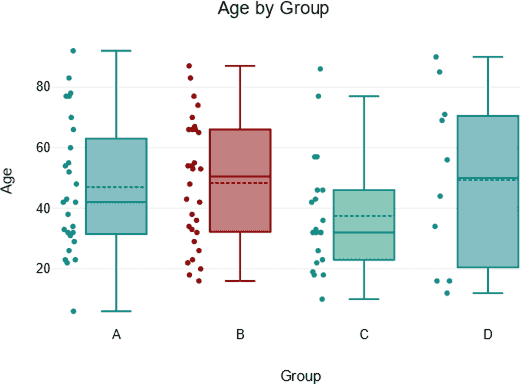

Para plotar o gráfico, use bibliotecas como: [matlotlib](https://matplotlib.org/stable/), [seaborn](https://seaborn.pydata.org/), [plotly](https://plotly.com/)

C:\Users\slash\AppData\Local\Temp\ipykernel_7432\1395193907.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Occupation', data=dataset, palette='dark')


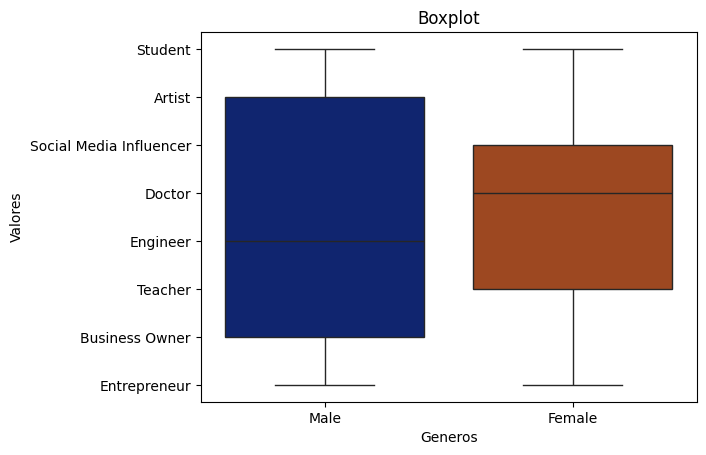

In [13]:
sns.boxplot(x='Gender', y='Occupation', data=dataset, palette='dark')
plt.title('Boxplot')
plt.xlabel('Generos')
plt.ylabel('Valores')
plt.show()
#bloxpot = coluna numerica

## 1.2 - Limpeza de dados

---



Agora que temos uma visão geral dos dados, é hora de limpá-los! Remova inconsistências, como dados ausentes e tipos incorretos, para garantir a qualidade da análise exploratória. Novamente, consulte a documentação do pandas para ajudar nesse processo.

###Lembre-se que existem muitas funções ao seu favor! ✨

**dropna()**: Remove as linhas ou colunas com valores ausentes(nulos) ou irrelevantes para sua análise.

**fillna()**: Preenche os valores ausentes com algum valor específico, como a média, a mediana ou um valor constante, dependendo do contexto.

Essas funções são essenciais para garantir que seu dataset esteja limpo e pronto para análise! E o melhor é que existem muitas outras opções além dessas. Dêem uma olhada na documentação e descubram quais outras funções podem se adequar melhor à análise de vocês.

In [14]:
dataset.drop(columns=['User ID', 'Age','Education Level', 'Interests', 'Occupation', 'Looking For', 'Children', 'Swiping History', 'Frequency of Usage'])

,Gender,Height
0,Male,5.240385
1,Female,4.937625
2,Female,5.806296
3,Female,5.101402
4,Male,5.986670
...,...,...
495,Male,5.316685
496,Female,5.070365
497,Male,4.871727
498,Male,5.647436


## 1.3 - Análise Exploratória dos Dados (EDA)

---



🔍 Após concluir a etapa de limpeza dos dados, agora é o momento de analisar mais a fundo o que está acontecendo no dataset.

O próximo passo é identificar correlações e examinar a distribuição das variáveis presentes. Para isso, recomenda-se o uso da biblioteca [matplotlib](https://matplotlib.org/) para criar gráficos que representem essas relações.

5.486629134045308
5.4461905853392345


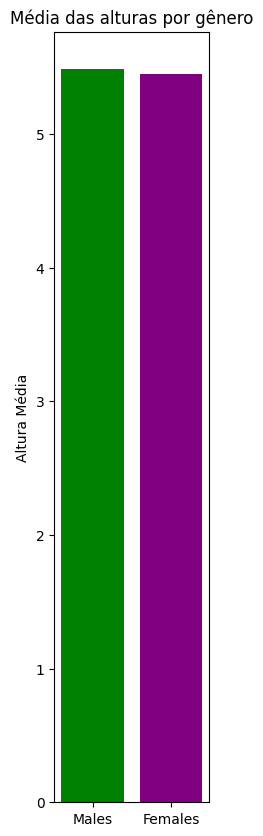

In [15]:
media_homem = dataset[dataset['Gender'] == 'Male']["Height"].mean()
media_mulher = dataset[dataset['Gender'] == 'Female']["Height"].mean()

print(media_homem)
print(media_mulher)

plt.figure(figsize=(2,10))

plt.bar(["Males", "Females"], [media_homem, media_mulher], color=['green', 'purple'])
plt.ylabel("Altura Média")
plt.title("Média das alturas por gênero")

plt.show()

## 1.4 - Feature engeneering e dados categóricos

---



### 1.4.1 - Sempre que falamos de Data Science, lembramos dos diferentes tipos de dados. E, junto deles, surgem os temidos dados categóricos!

Esses dados são bem diferentes das variáveis numéricas, então a gente precisa dar uma atenção extra pra trabalhar com eles de forma eficaz. Bora transformar alguns deles usando os métodos que já vimos, como o **OneHotEncoder**! 🔥

Depois disso, vamos mergulhar no **Feature Engineering**!
Essa técnica é super poderosa e serve para extrair informações mais relevantes dos dados que já temos. Ela consiste em selecionar, manipular e transformar colunas e linhas do dataset, dando um novo significado ou enriquecendo as informações. Um exemplo clássico é a criação de uma coluna de IMC (Índice de Massa Corporal) a partir das colunas de altura e peso.

Agora é sua vez! Solte a criatividade e use sua intuição pra criar novos atributos a partir do que já está disponível.

**Dica**: Pegue as colunas que você já tem e use como base pra criar outras com características diferentes.

In [16]:
for idade in range(0, 500):
    if 18>= dataset.iloc[idade, 1] <= 25:   #A funcao .iloc[linha, coluna] permite selecionar dados do dataframe com base na sua posição numérica

        dataset.at[idade, 'Age Group'] = 'Jovem' #A funcao .at[linha, coluna] é usada para acessar um valor único por meio de um índice de linha e coluna específicos
    
    elif 25 < dataset.iloc[idade, 1] <= 30:

        dataset.at[idade, 'Age Group'] = 'Adulto'

    else:
        dataset.at[idade, 'Age Group'] = 'Mais Sabido'

dataset #Vai printar o dataset nas colunas bonitinhas e tudo top



,User ID,Age,Gender,Height,Interests,Looking For,Children,Education Level,Occupation,Swiping History,Frequency of Usage,Age Group
0,1,30,Male,5.240385,"['Sports', 'Cooking', 'Hiking', 'Music', 'Movi...",Casual Dating,No,High School,Student,96,Weekly,Adulto
1,2,27,Female,4.937625,"['Sports', 'Reading']",Friendship,Yes,Master's Degree,Artist,96,Monthly,Adulto
2,3,29,Female,5.806296,['Sports'],Casual Dating,No,Bachelor's Degree,Social Media Influencer,64,Daily,Adulto
3,4,29,Female,5.101402,['Reading'],Marriage,No,Ph.D.,Doctor,67,Daily,Adulto
4,5,32,Male,5.986670,"['Sports', 'Hiking', 'Music', 'Movies', 'Readi...",Long-term Relationship,Yes,Ph.D.,Engineer,93,Monthly,Mais Sabido
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,27,Male,5.316685,"['Hiking', 'Sports', 'Travel']",Marriage,No,Bachelor's Degree,Entrepreneur,92,Daily,Adulto
496,497,30,Female,5.070365,"['Hiking', 'Reading', 'Travel', 'Sports', 'Mus...",Marriage,No,High School,Social Media Influencer,65,Daily,Adulto
497,498,33,Male,4.871727,"['Music', 'Reading', 'Movies', 'Cooking', 'Spo...",Marriage,No,Bachelor's Degree,Engineer,93,Daily,Mais Sabido
498,499,32,Male,5.647436,"['Hiking', 'Reading', 'Movies', 'Sports']",Marriage,Maybe,High School,Business Owner,71,Monthly,Mais Sabido


### 1.4.2 - Em poucos termos, computadores não conseguem entender texto de maneira alguma, mas números, ah, esses as máquinas entendem bem pra caramba! Então, que tal usar as técnicas que aprendemos pra deixar tudo necessário em números?

**Dica**: Sempre que temos uma feature categórica que possui apenas 2 elementos, podemos transformar ela em uma flag binária! Agora o que isso significa eu deixo pra você pesquisar 😉

In [17]:
dataset['Binary_Gender'] = (dataset['Gender'] == 'Female').astype(int) 

dataset

#Etapas:
#Criei uma coluna chamada Binary_Gender 
#Dentro do dataset, na coluna 'Gender' , tem uma operação lógica: 
#as linhas que tiverem o objeto 'Female', será True, as que não tiverem, False
#A funcao astype() é usada para converter o tipo de dados de um objeto em um tipo específico, no caso aqui foi o int
#Entao, o que era True, ficou 1, e o que era False, ficou 0


,User ID,Age,Gender,Height,Interests,Looking For,Children,Education Level,Occupation,Swiping History,Frequency of Usage,Age Group,Binary_Gender
0,1,30,Male,5.240385,"['Sports', 'Cooking', 'Hiking', 'Music', 'Movi...",Casual Dating,No,High School,Student,96,Weekly,Adulto,0
1,2,27,Female,4.937625,"['Sports', 'Reading']",Friendship,Yes,Master's Degree,Artist,96,Monthly,Adulto,1
2,3,29,Female,5.806296,['Sports'],Casual Dating,No,Bachelor's Degree,Social Media Influencer,64,Daily,Adulto,1
3,4,29,Female,5.101402,['Reading'],Marriage,No,Ph.D.,Doctor,67,Daily,Adulto,1
4,5,32,Male,5.986670,"['Sports', 'Hiking', 'Music', 'Movies', 'Readi...",Long-term Relationship,Yes,Ph.D.,Engineer,93,Monthly,Mais Sabido,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,27,Male,5.316685,"['Hiking', 'Sports', 'Travel']",Marriage,No,Bachelor's Degree,Entrepreneur,92,Daily,Adulto,0
496,497,30,Female,5.070365,"['Hiking', 'Reading', 'Travel', 'Sports', 'Mus...",Marriage,No,High School,Social Media Influencer,65,Daily,Adulto,1
497,498,33,Male,4.871727,"['Music', 'Reading', 'Movies', 'Cooking', 'Spo...",Marriage,No,Bachelor's Degree,Engineer,93,Daily,Mais Sabido,0
498,499,32,Male,5.647436,"['Hiking', 'Reading', 'Movies', 'Sports']",Marriage,Maybe,High School,Business Owner,71,Monthly,Mais Sabido,0
